In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\Prathamesh\Downloads\Projects\British Airways Job Simulation\british_airways_reviews_full.csv")

In [3]:
df.head()

,Name,Date Published,Review Title,Review Content,Star Rating,Aircraft,Traveller Type,Cabin Flown,Route,Date Flown,Recommended
0,D Gale,13th April 2025,"""checkin was very rude to us""",✅ Trip Verified | The employee at Venice Air...,3.0,NaN,Couple Leisure,Economy Class,Venice to London,April 2025,no
1,R Hardin,12th April 2025,"""forced to check-in carry-ons""","✅ Trip Verified | I had only 1 bag with me, ...",1.0,Airbus A321neo,Solo Leisure,Economy Class,Heathrow to Cairo,April 2025,no
2,E Smyth,9th April 2025,“Pleasant cabin crew”,✅ Trip Verified | Check in and security at T5 ...,7.0,A320,Family Leisure,Business Class,London Heathrow to Barcelona,April 2025,yes
3,Robert Bone,3rd April 2025,"""one of the best BA First flights I’ve had""",Not Verified | LHR T5 BA Gold Wing worked wel...,9.0,Boeing 777 200,Business,First Class,London to Seattle,April 2025,yes
4,J Jones,31st March 2025,"""Very good service on this route""",Not Verified | Very good service on this rout...,10.0,A320,Couple Leisure,Business Class,London Gatwick to Fuerteventura,March 2025,yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            3500 non-null   object 
 1   Date Published  3500 non-null   object 
 2   Review Title    3500 non-null   object 
 3   Review Content  3500 non-null   object 
 4   Star Rating     3498 non-null   float64
 5   Aircraft        2048 non-null   object 
 6   Traveller Type  3158 non-null   object 
 7   Cabin Flown     3498 non-null   object 
 8   Route           3153 non-null   object 
 9   Date Flown      3151 non-null   object 
 10  Recommended     3500 non-null   object 
dtypes: float64(1), object(10)
memory usage: 300.9+ KB


In [5]:
# Drop duplicates
df.drop_duplicates(inplace=True)

# Strip whitespace and standardize text columns
text_cols = ["Name", "Review Title", "Review Content", "Aircraft", "Traveller Type", "Cabin Flown", "Route"]
for col in text_cols:
    df[col] = df[col].astype(str).str.strip().str.lower()

# Fix the 'Recommended' column
df['Recommended'] = df['Recommended'].map(lambda x: x.strip().lower() if pd.notnull(x) else x)

# Convert 'Star Rating' to numeric
df['Star Rating'] = pd.to_numeric(df['Star Rating'], errors='coerce')

# Convert 'Date Published' to datetime
df['Date Published'] = pd.to_datetime(df['Date Published'], errors='coerce')

In [6]:
df

,Name,Date Published,Review Title,Review Content,Star Rating,Aircraft,Traveller Type,Cabin Flown,Route,Date Flown,Recommended
0,d gale,2025-04-13,"""checkin was very rude to us""",✅ trip verified | the employee at venice air...,3.0,nan,couple leisure,economy class,venice to london,April 2025,no
1,r hardin,2025-04-12,"""forced to check-in carry-ons""","✅ trip verified | i had only 1 bag with me, ...",1.0,airbus a321neo,solo leisure,economy class,heathrow to cairo,April 2025,no
2,e smyth,2025-04-09,“pleasant cabin crew”,✅ trip verified | check in and security at t5 ...,7.0,a320,family leisure,business class,london heathrow to barcelona,April 2025,yes
3,robert bone,NaT,"""one of the best ba first flights i’ve had""",not verified | lhr t5 ba gold wing worked wel...,9.0,boeing 777 200,business,first class,london to seattle,April 2025,yes
4,j jones,NaT,"""very good service on this route""",not verified | very good service on this rout...,10.0,a320,couple leisure,business class,london gatwick to fuerteventura,March 2025,yes
...,...,...,...,...,...,...,...,...,...,...,...
3495,c down,NaT,british airways customer review,lhr-hkg b777 club world. i was lucky enough to...,8.0,nan,nan,business class,nan,NaN,yes
3496,balaji krishnamoorthy,NaT,british airways customer review,london to istanbul and return - economy class....,10.0,nan,nan,economy class,nan,NaN,yes
3497,l cameron-lewis,2014-11-25,british airways customer review,check-in in toronto was ok no fast track was a...,1.0,nan,nan,business class,nan,NaN,no
3498,j rodder,2014-11-25,british airways customer review,london city to florence. lcy is a great stress...,10.0,nan,nan,economy class,nan,NaN,yes


In [7]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


# nltk.download("stopwords")
# nltk.download("punkt")
# nltk.download("wordnet")
# nltk.download("omw-1.4")


stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    if pd.isnull(text):
        return ""
    
    # Lowercase
    text = text.lower()
    
    # Remove special characters and numbers
    text = re.sub(r"[^a-z\s]", "", text)
    
    # Tokenize
    tokens = nltk.word_tokenize(text)
    
    # Remove stopwords and lemmatize
    cleaned = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words and len(word) > 2]
    
    return " ".join(cleaned)

In [8]:
df["Cleaned Review Title"] = df["Review Title"].apply(clean_text)
df["Cleaned Review Content"] = df["Review Content"].apply(clean_text)

# Optional: Check a few
df[["Review Title", "Cleaned Review Title", "Review Content", "Cleaned Review Content"]].sample(3)

,Review Title,Cleaned Review Title,Review Content,Cleaned Review Content
7,"""full of attitude to me""",full attitude,"✅ trip verified | the service was rude, full...",trip verified service rude full attitude food ...
2176,"""another disappointing experience from ba""",another disappointing experience,flight from lgw to st lucia got off to a puzzl...,flight lgw lucia got puzzling start check prio...
1974,"""ba has gone cattle""",gone cattle,✅ verified review | british airways has got it...,verified review british airway got wrong short...


In [9]:
df["Combined Cleaned Text"] = df["Cleaned Review Title"] + " " + df["Cleaned Review Content"]

In [10]:
df['Route'] = df['Route'].apply(lambda x: 'Route not available' if str(x).strip().lower() in ['nan', 'none'] else x)

In [11]:
df.head()

,Name,Date Published,Review Title,Review Content,Star Rating,Aircraft,Traveller Type,Cabin Flown,Route,Date Flown,Recommended,Cleaned Review Title,Cleaned Review Content,Combined Cleaned Text
0,d gale,2025-04-13,"""checkin was very rude to us""",✅ trip verified | the employee at venice air...,3.0,nan,couple leisure,economy class,venice to london,April 2025,no,checkin rude,trip verified employee venice airport checkin ...,checkin rude trip verified employee venice air...
1,r hardin,2025-04-12,"""forced to check-in carry-ons""","✅ trip verified | i had only 1 bag with me, ...",1.0,airbus a321neo,solo leisure,economy class,heathrow to cairo,April 2025,no,forced checkin carryons,trip verified bag carry trolley everyone one b...,forced checkin carryons trip verified bag carr...
2,e smyth,2025-04-09,“pleasant cabin crew”,✅ trip verified | check in and security at t5 ...,7.0,a320,family leisure,business class,london heathrow to barcelona,April 2025,yes,pleasant cabin crew,trip verified check security quick gallery lou...,pleasant cabin crew trip verified check securi...
3,robert bone,NaT,"""one of the best ba first flights i’ve had""",not verified | lhr t5 ba gold wing worked wel...,9.0,boeing 777 200,business,first class,london to seattle,April 2025,yes,one best first flight ive,verified lhr gold wing worked well pleasant ch...,one best first flight ive verified lhr gold wi...
4,j jones,NaT,"""very good service on this route""",not verified | very good service on this rout...,10.0,a320,couple leisure,business class,london gatwick to fuerteventura,March 2025,yes,good service route,verified good service route march cabin crew w...,good service route verified good service route...


In [12]:
df['Star Rating'].value_counts()

Star Rating
1.0     898
2.0     408
3.0     404
8.0     339
10.0    284
7.0     275
9.0     268
4.0     235
5.0     212
6.0     169
Name: count, dtype: int64

In [13]:
mode_rating = df['Star Rating'].mode()[0]
df['Star Rating'].fillna(mode_rating, inplace=True)

C:\Users\Prathamesh\AppData\Local\Temp\ipykernel_2612\815926475.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Star Rating'].fillna(mode_rating, inplace=True)


In [14]:
df['Date Published'].unique()

<DatetimeArray>
['2025-04-13 00:00:00', '2025-04-12 00:00:00', '2025-04-09 00:00:00',
                 'NaT', '2025-03-19 00:00:00', '2025-03-16 00:00:00',
 '2025-03-07 00:00:00', '2025-02-28 00:00:00', '2025-02-27 00:00:00',
 '2025-02-18 00:00:00',
 ...
 '2015-01-26 00:00:00', '2015-01-19 00:00:00', '2015-01-14 00:00:00',
 '2015-01-11 00:00:00', '2015-01-05 00:00:00', '2014-12-29 00:00:00',
 '2014-12-18 00:00:00', '2014-12-10 00:00:00', '2014-12-04 00:00:00',
 '2014-11-25 00:00:00']
Length: 1500, dtype: datetime64[ns]

In [15]:
# Check the mode of actual dates (not 'Unknown')
valid_mode = df[df['Date Published'] != 'Unknown']['Date Published'].mode()[0]

# Fill missing values with the mode of actual valid dates
df['Date Published'].fillna(valid_mode, inplace=True)

# Convert to the required format
df['Date Published'] = df['Date Published'].dt.strftime('%Y-%m')

# Optional: Strip any extra spaces (just in case)
df['Date Published'] = df['Date Published'].str.strip()

# Check the unique values again
print(df['Date Published'].unique())

['2025-04' '2015-01' '2025-03' '2025-02' '2025-01' '2024-12' '2024-11'
 '2024-10' '2024-09' '2024-08' '2024-07' '2024-06' '2024-05' '2024-04'
 '2024-03' '2024-02' '2024-01' '2023-12' '2023-11' '2023-10' '2023-09'
 '2023-08' '2023-07' '2023-06' '2023-05' '2023-04' '2023-03' '2023-02'
 '2023-01' '2022-12' '2022-11' '2022-10' '2022-09' '2022-08' '2022-07'
 '2022-06' '2022-05' '2022-04' '2022-03' '2022-02' '2022-01' '2021-12'
 '2021-11' '2021-10' '2021-09' '2021-08' '2021-07' '2021-06' '2021-05'
 '2021-04' '2021-03' '2021-02' '2020-12' '2020-10' '2020-09' '2020-08'
 '2020-06' '2020-05' '2020-04' '2020-03' '2020-02' '2020-01' '2019-12'
 '2019-11' '2019-10' '2019-09' '2019-08' '2019-07' '2019-06' '2019-05'
 '2019-04' '2019-03' '2019-02' '2019-01' '2018-12' '2018-11' '2018-10'
 '2018-09' '2018-08' '2018-07' '2018-06' '2018-05' '2018-04' '2018-03'
 '2018-02' '2018-01' '2017-12' '2017-11' '2017-10' '2017-09' '2017-08'
 '2017-07' '2017-06' '2017-05' '2017-04' '2017-03' '2017-02' '2017-01'
 '2016

C:\Users\Prathamesh\AppData\Local\Temp\ipykernel_2612\2642652591.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Date Published'].fillna(valid_mode, inplace=True)


In [16]:
df['Date Published'].unique()

array(['2025-04', '2015-01', '2025-03', '2025-02', '2025-01', '2024-12',
       '2024-11', '2024-10', '2024-09', '2024-08', '2024-07', '2024-06',
       '2024-05', '2024-04', '2024-03', '2024-02', '2024-01', '2023-12',
       '2023-11', '2023-10', '2023-09', '2023-08', '2023-07', '2023-06',
       '2023-05', '2023-04', '2023-03', '2023-02', '2023-01', '2022-12',
       '2022-11', '2022-10', '2022-09', '2022-08', '2022-07', '2022-06',
       '2022-05', '2022-04', '2022-03', '2022-02', '2022-01', '2021-12',
       '2021-11', '2021-10', '2021-09', '2021-08', '2021-07', '2021-06',
       '2021-05', '2021-04', '2021-03', '2021-02', '2020-12', '2020-10',
       '2020-09', '2020-08', '2020-06', '2020-05', '2020-04', '2020-03',
       '2020-02', '2020-01', '2019-12', '2019-11', '2019-10', '2019-09',
       '2019-08', '2019-07', '2019-06', '2019-05', '2019-04', '2019-03',
       '2019-02', '2019-01', '2018-12', '2018-11', '2018-10', '2018-09',
       '2018-08', '2018-07', '2018-06', '2018-05', 

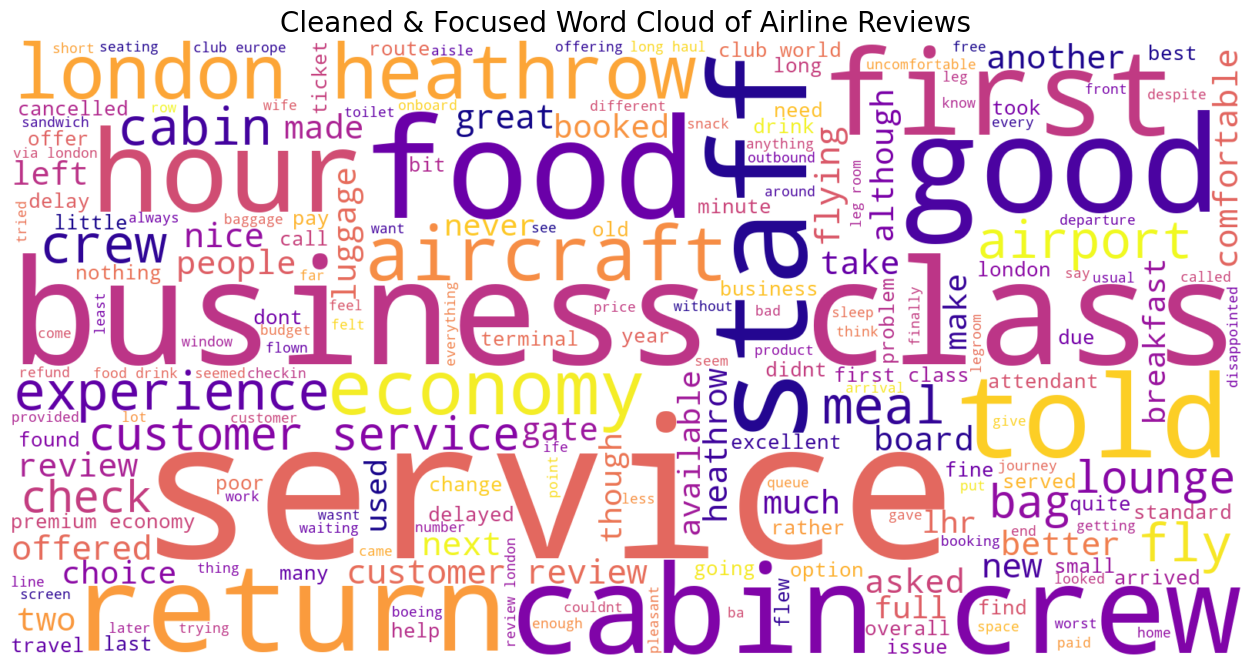

In [54]:
import re
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Combine the text
all_text = " ".join(df['Combined Cleaned Text'].fillna(''))

# Clean it more aggressively
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\b(british airways|trip verified|airline|airways|flight|flights|plane|seat|boarding)\b', '', text)
    text = re.sub(r'[^\w\s]', '', text)  # remove punctuation
    text = re.sub(r'\d+', '', text)      # remove digits
    return text

all_text_cleaned = clean_text(all_text)

# Define stopwords
custom_stopwords = set(STOPWORDS)
custom_stopwords.update([
    'trip', 'verified', 'british', 'airways', 'flight', 'flights',
    'airline', 'seat', 'seats', 'plane', 'boarding', 'given', 'said',
    'get', 'got', 'also', 'one', 'go', 'went', 'would', 'could', 'still',
    'really', 'back', 'way', 'use', 'using', 'day', 'time', 'even', 'well','airway','passenger'
])

# Create wordcloud
wordcloud = WordCloud(
    width=1600,
    height=800,
    background_color='white',
    colormap='plasma',
    stopwords=custom_stopwords
).generate(all_text_cleaned)

# Plot it
plt.figure(figsize=(16, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Cleaned & Focused Word Cloud of Airline Reviews', fontsize=20)
plt.show()

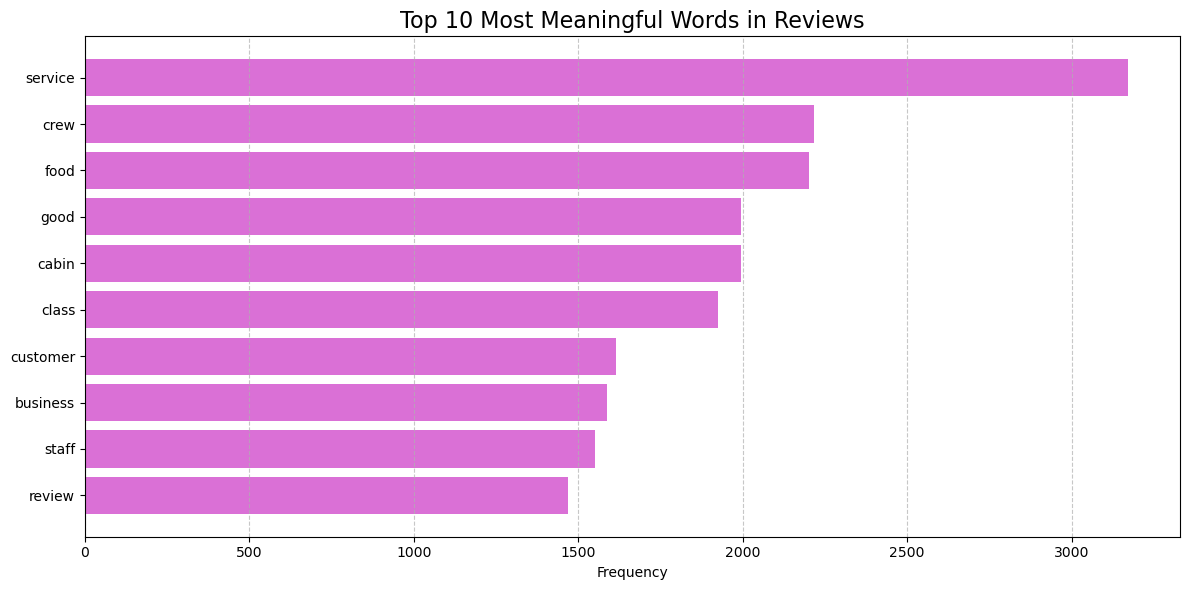

In [59]:
import re
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import STOPWORDS

# Step 1: Define unwanted words
custom_stopwords = set(STOPWORDS)
custom_stopwords.update([
    'trip', 'verified', 'british', 'airways', 'flight', 'flights',
    'airline', 'seat', 'seats', 'plane', 'boarding', 'given', 'said',
    'get', 'got', 'also', 'one', 'go', 'went', 'would', 'could', 'still',
    'really', 'back', 'way', 'use', 'using', 'day', 'time', 'even', 'well','airway','london','hour','heathrow'
])

# Step 2: Clean the text
def clean_and_tokenize(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)   # remove punctuation
    text = re.sub(r'\d+', '', text)       # remove numbers
    words = text.split()
    words = [word for word in words if word not in custom_stopwords]
    return words

all_text = " ".join(df['Combined Cleaned Text'].fillna(''))
filtered_words = clean_and_tokenize(all_text)

# Step 3: Count the top words
common_words = Counter(filtered_words).most_common(10)
common_df = pd.DataFrame(common_words, columns=['Word', 'Frequency'])

# Step 4: Plot it
plt.figure(figsize=(12, 6))
plt.barh(common_df['Word'][::-1], common_df['Frequency'][::-1], color='orchid')
plt.title('Top 10 Most Meaningful Words in Reviews', fontsize=16)
plt.xlabel('Frequency')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

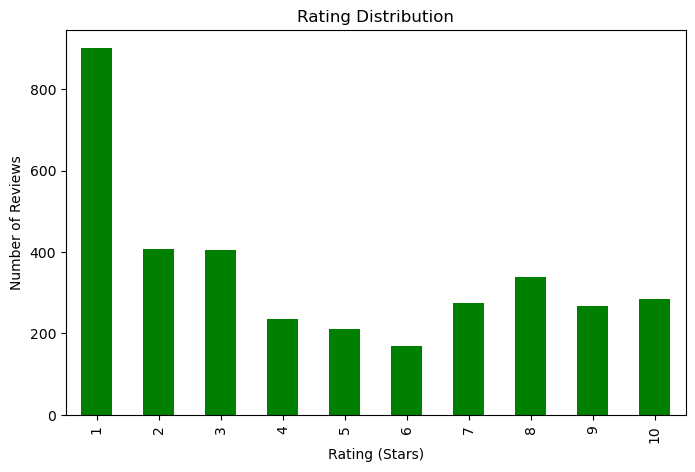

In [19]:
df['Star Rating'] = pd.to_numeric(df['Star Rating'], errors='coerce')

plt.figure(figsize=(8, 5))
df['Star Rating'].dropna().astype(int).value_counts().sort_index().plot(kind='bar', color='green')
plt.title('Rating Distribution')
plt.xlabel('Rating (Stars)')
plt.ylabel('Number of Reviews')
plt.show()

In [20]:
df.columns

Index(['Name', 'Date Published', 'Review Title', 'Review Content',
       'Star Rating', 'Aircraft', 'Traveller Type', 'Cabin Flown', 'Route',
       'Date Flown', 'Recommended', 'Cleaned Review Title',
       'Cleaned Review Content', 'Combined Cleaned Text'],
      dtype='object')

In [21]:
df['Star Rating'].unique()

array([ 3.,  1.,  7.,  9., 10.,  5.,  4.,  2.,  8.,  6.])

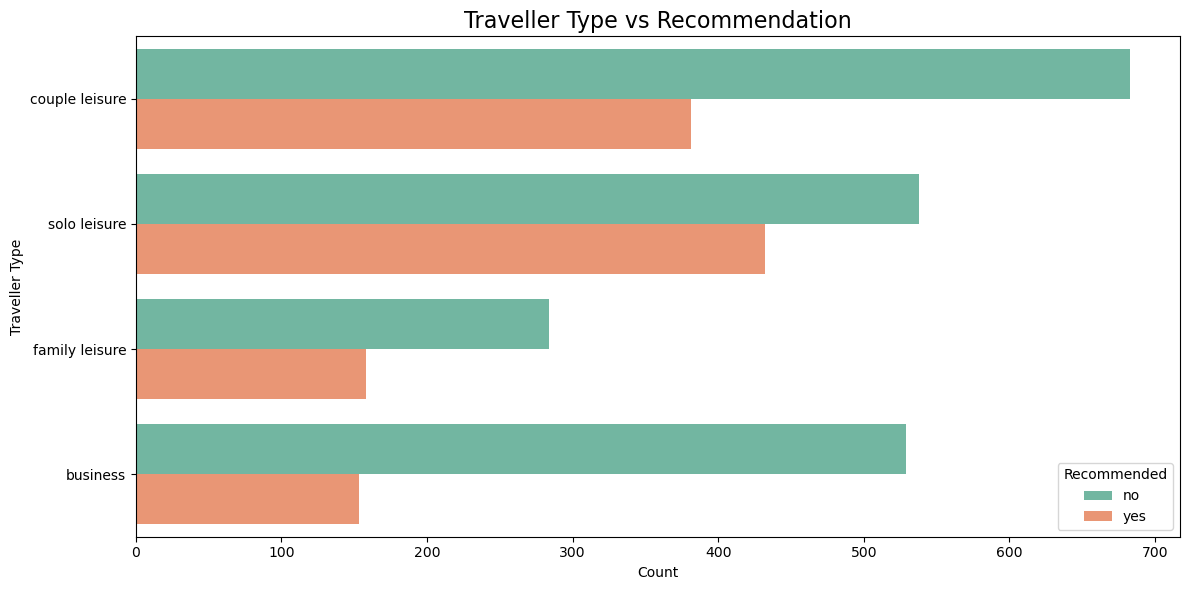

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter out 'nan' strings
filtered_df = df[df['Traveller Type'].str.lower() != 'nan']

plt.figure(figsize=(12, 6))
sns.countplot(data=filtered_df, y='Traveller Type', hue='Recommended', palette='Set2')
plt.title('Traveller Type vs Recommendation', fontsize=16)
plt.xlabel('Count')
plt.ylabel('Traveller Type')
plt.tight_layout()
plt.show()

C:\Users\Prathamesh\AppData\Local\Temp\ipykernel_2612\2675577840.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Cabin Flown', y='Star Rating', palette='pastel')


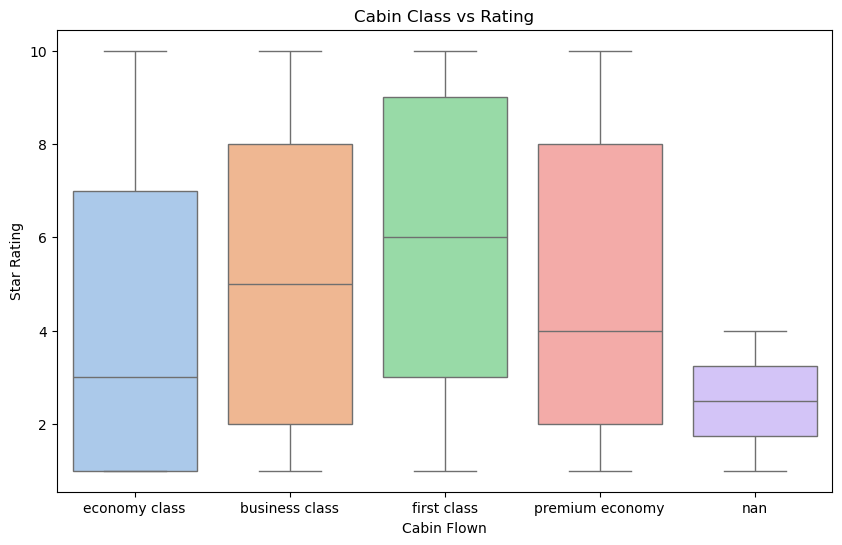

In [23]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Cabin Flown', y='Star Rating', palette='pastel')
plt.title('Cabin Class vs Rating')
plt.show()

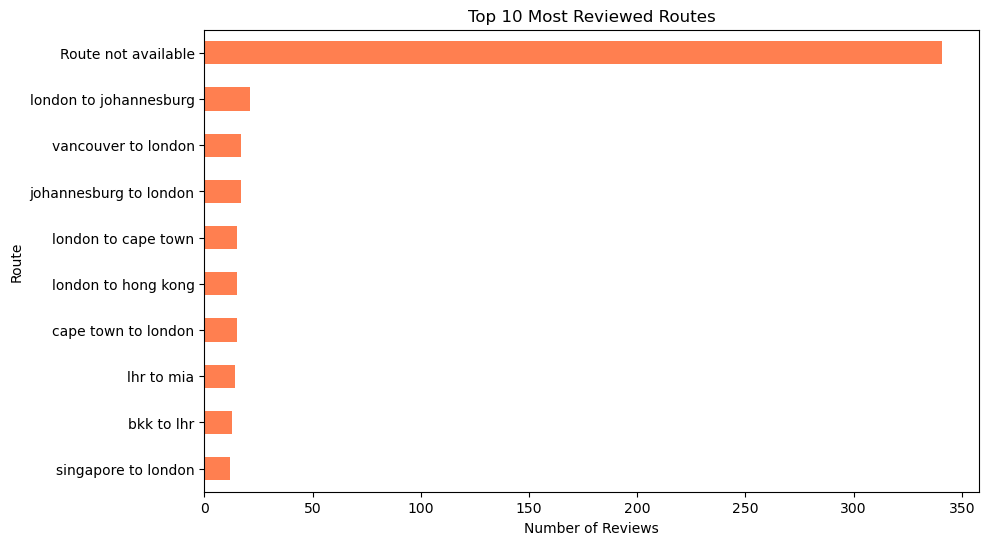

In [24]:
top_routes = df['Route'].value_counts().head(10)

plt.figure(figsize=(10,6))
top_routes.plot(kind='barh', color='coral')
plt.title('Top 10 Most Reviewed Routes')
plt.xlabel('Number of Reviews')
plt.gca().invert_yaxis()
plt.show()

In [25]:
# We'll use the Combined Cleaned Text as features, and map the star ratings to sentiment labels.

def label_sentiment(rating):
    if pd.isnull(rating):
        return "neutral"  # or drop, depending on your use-case
    elif rating >= 7:
        return "positive"
    elif rating >= 4:
        return "neutral"
    else:
        return "negative"

df['Sentiment'] = df['Star Rating'].apply(label_sentiment)

In [26]:
df.head(3)

,Name,Date Published,Review Title,Review Content,Star Rating,Aircraft,Traveller Type,Cabin Flown,Route,Date Flown,Recommended,Cleaned Review Title,Cleaned Review Content,Combined Cleaned Text,Sentiment
0,d gale,2025-04,"""checkin was very rude to us""",✅ trip verified | the employee at venice air...,3.0,nan,couple leisure,economy class,venice to london,April 2025,no,checkin rude,trip verified employee venice airport checkin ...,checkin rude trip verified employee venice air...,negative
1,r hardin,2025-04,"""forced to check-in carry-ons""","✅ trip verified | i had only 1 bag with me, ...",1.0,airbus a321neo,solo leisure,economy class,heathrow to cairo,April 2025,no,forced checkin carryons,trip verified bag carry trolley everyone one b...,forced checkin carryons trip verified bag carr...,negative
2,e smyth,2025-04,“pleasant cabin crew”,✅ trip verified | check in and security at t5 ...,7.0,a320,family leisure,business class,london heathrow to barcelona,April 2025,yes,pleasant cabin crew,trip verified check security quick gallery lou...,pleasant cabin crew trip verified check securi...,positive


In [27]:
df['Sentiment'].unique()

array(['negative', 'positive', 'neutral'], dtype=object)

In [28]:
df['Sentiment'].value_counts()

Sentiment
negative    1712
positive    1166
neutral      616
Name: count, dtype: int64

C:\Users\Prathamesh\AppData\Local\Temp\ipykernel_2612\558390719.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment', data=df, palette='Set2')


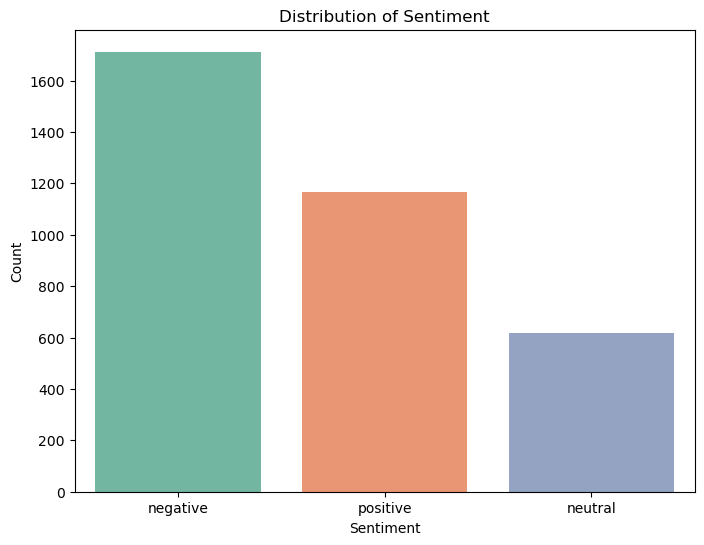

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of Sentiment
plt.figure(figsize=(8, 6))
sns.countplot(x='Sentiment', data=df, palette='Set2')
plt.title('Distribution of Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

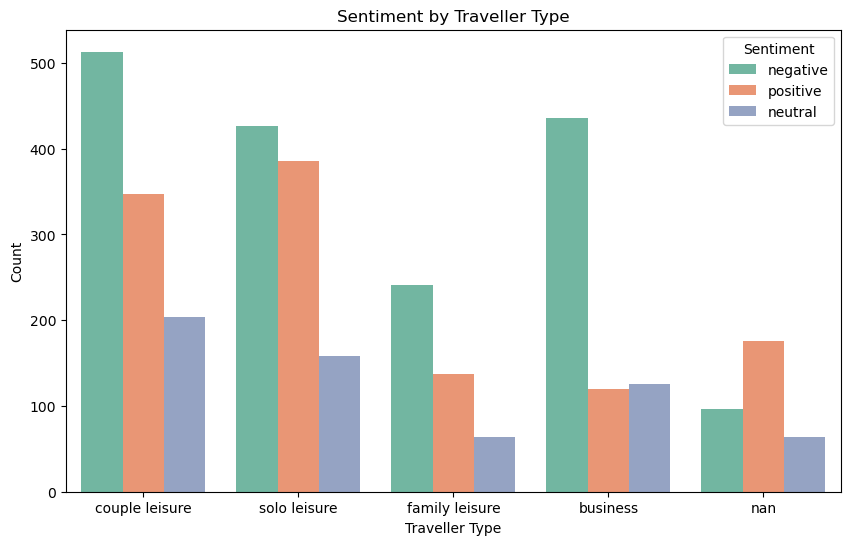

In [40]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Traveller Type', hue='Sentiment', data=df, palette='Set2')
plt.title('Sentiment by Traveller Type')
plt.xlabel('Traveller Type')
plt.ylabel('Count')
plt.show()

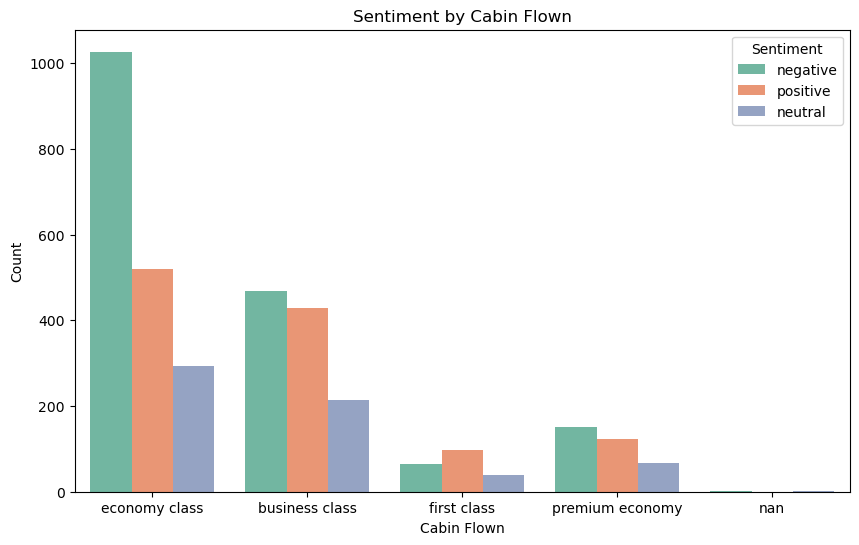

In [41]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Cabin Flown', hue='Sentiment', data=df, palette='Set2')
plt.title('Sentiment by Cabin Flown')
plt.xlabel('Cabin Flown')
plt.ylabel('Count')
plt.show()

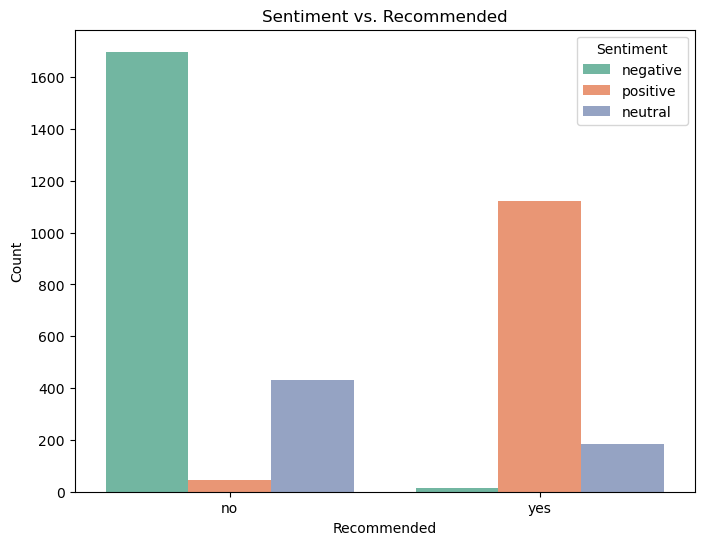

In [43]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Recommended', hue='Sentiment', data=df, palette='Set2')
plt.title('Sentiment vs. Recommended')
plt.xlabel('Recommended')
plt.ylabel('Count')
plt.show()

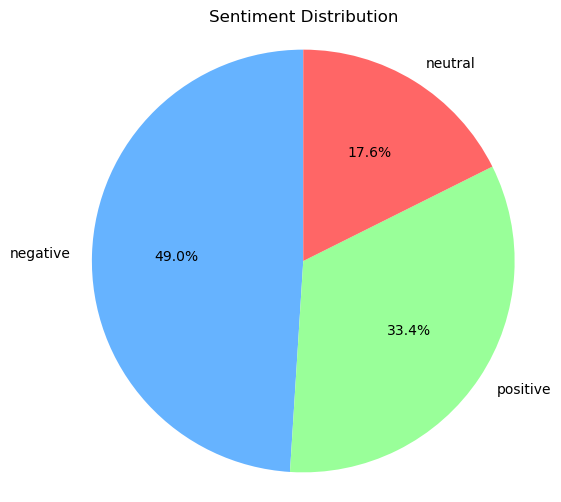

In [44]:
import matplotlib.pyplot as plt

sentiment_counts = df['Sentiment'].value_counts()
labels = sentiment_counts.index
sizes = sentiment_counts.values

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#99ff99','#ff6666'])
plt.title("Sentiment Distribution")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.savefig('sentiment_distribution.png')  # Save it for your slide
plt.show()

In [46]:
!pip install python-pptx